# Pandas Examples

---
## Example 1 - Product Demand

In [63]:
import pandas as pd
import numpy as np

In [64]:
# Create a list of products and a list of demands
products = ['Product 1', 'Product 2', 'Product 4', 'Product 6']
demands = [29, 17, 42, 21]

In [65]:
# Create a data set from these two lists
productDataset = list(zip(products, demands))
productDataset

[('Product 1', 29), ('Product 2', 17), ('Product 4', 42), ('Product 6', 21)]

In [66]:
# Create a pandas dataframe
df = pd.DataFrame(data=productDataset, columns=['Product Name', 'Demand'])
df

,Product Name,Demand
0,Product 1,29
1,Product 2,17
2,Product 4,42
3,Product 6,21


#### 1) Print just the column of product names:

In [67]:
df['Product Name']

0    Product 1
1    Product 2
2    Product 4
3    Product 6
Name: Product Name, dtype: object

#### 2) Print the demand column first, and the product name column second:

In [68]:
df[['Demand', 'Product Name']] # If you get key error messages, you must be getting something from the wrong place

,Demand,Product Name
0,29,Product 1
1,17,Product 2
2,42,Product 4
3,21,Product 6


#### 3) Print only the first 2 rows of data:

In [69]:
df.iloc[0:2]

,Product Name,Demand
0,Product 1,29
1,Product 2,17


#### 4) Print only the first 2 rows, and only the demand column:

In [70]:
df.iloc[0:2]['Demand']

0    29
1    17
Name: Demand, dtype: int64

In [71]:
df['Demand'][0:2]

0    29
1    17
Name: Demand, dtype: int64

In [72]:
df[:2][['Demand']]

,Demand
0,29
1,17


In [73]:
df.loc['0':'1']['Demand']

0    29
1    17
Name: Demand, dtype: int64

In [74]:
df['Demand'].iloc[0:2]

0    29
1    17
Name: Demand, dtype: int64

#### 5) Print only the last 2 rows of data.  Print the demand column before the product name column.

In [75]:
df.iloc[2:4][['Demand', 'Product Name']]

,Demand,Product Name
2,42,Product 4
3,21,Product 6


#### 6) Sort the products according to decreasing demand:

In [76]:
df.sort_values(ascending = False, by = 'Demand')

,Product Name,Demand
2,Product 4,42
0,Product 1,29
3,Product 6,21
1,Product 2,17


#### 7)  Find the product with the maximum demand
**NOTE:  Save both the product name and the corresponding maximum demand.  Do not use "for" loops.**

In [77]:
# Approach 1:
df1 = df.sort_values(['Demand'], ascending = False).head(1)
print(df1)

  Product Name  Demand
2    Product 4      42


In [78]:
# If we just want the product name of the max:
myProd = df1['Product Name'].values
myProd[0]

'Product 4'

In [79]:
# If we just want the demand:
myDemand = df1['Demand'].values
myDemand[0]

42

In [80]:
# Approach 2:
maxDemand = df['Demand'].max()
maxDemand

42

In [81]:
maxProduct = df['Product Name'][df['Demand'] == maxDemand].values
maxProduct[0]

'Product 4'

In [82]:
# Approach 3:
[(a, b)] = df[['Product Name', 'Demand']][df['Demand'] == df['Demand'].max()].values
[(a,b)]

[('Product 4', 42)]

# Below are other methods to print the row with max Demand

In [83]:
df.loc[df['Demand'].idxmax()]

Product Name    Product 4
Demand                 42
Name: 2, dtype: object

In [84]:
df[df['Demand']==df['Demand'].max()]

,Product Name,Demand
2,Product 4,42


#### 8)  Add a new column of data, named 'Sales Price'

**Assign the values as numpy NaN for now***

In [85]:
df['Sales Price'] = np.nan
df

,Product Name,Demand,Sales Price
0,Product 1,29,NaN
1,Product 2,17,NaN
2,Product 4,42,NaN
3,Product 6,21,NaN


#### 9) Assign the following prices to your new column

In [86]:
#prices = [1.99, 2.50, 0.99, 3.75]

# We can use a dictionary, but we need to convert it to a dataframe using pd.Series
prices = {0: 1.99, 2:2.50, 3:0.99}
prices

{0: 1.99, 2: 2.5, 3: 0.99}

In [87]:
priceSeries = pd.Series(prices)
priceSeries

0    1.99
2    2.50
3    0.99
dtype: float64

In [88]:
# Now that it has been turned into a series, we can concatenate the series to the dataframe as below:
df['Sales Price'] = priceSeries
df

,Product Name,Demand,Sales Price
0,Product 1,29,1.99
1,Product 2,17,NaN
2,Product 4,42,2.50
3,Product 6,21,0.99


#### 10)  Add another column named 'Cost', with the following values

In [89]:
costs = [1.0, 2.0, 0.5, 2.25]

In [90]:
df['Cost'] = costs
df

,Product Name,Demand,Sales Price,Cost
0,Product 1,29,1.99,1.00
1,Product 2,17,NaN,2.00
2,Product 4,42,2.50,0.50
3,Product 6,21,0.99,2.25


#### 11) Add yet another column named 'Profit'
**Profit = (sales price) - (cost)**

In [91]:
df['Profit'] = df['Sales Price'] - df['Cost']
df

,Product Name,Demand,Sales Price,Cost,Profit
0,Product 1,29,1.99,1.00,0.99
1,Product 2,17,NaN,2.00,NaN
2,Product 4,42,2.50,0.50,2.00
3,Product 6,21,0.99,2.25,-1.26


#### 12)  Add a row of data
**Product 9 has a demand of 99, a sales price of 9.99, a cost of 8.88, and a profit of 1.11**

In [95]:
df.loc[len(df)] = ['Product 9', 99, 9.99, 8.88, 1.11]
df

ValueError: cannot set a row with mismatched columns

#### 13) Delete the Sales Price column

In [96]:
del df['Sales Price']
df

KeyError: 'Sales Price'

#### 14) Make Product Name an index

In [97]:
df.index = df['Product Name']
df

,Product Name,Demand,Cost,Profit
Product Name,,,,
Product 1,Product 1,29,1.00,0.99
Product 2,Product 2,17,2.00,NaN
Product 4,Product 4,42,0.50,2.00
Product 6,Product 6,21,2.25,-1.26
Product 9,Product 9,99,8.88,1.11


#### 15)  Filter just for Product 4

In [98]:
df.loc['Product 4']

Product Name    Product 4
Demand                 42
Cost                  0.5
Profit                  2
Name: Product 4, dtype: object

#### 16) Filter for products 1 through 4

In [99]:
df.loc['Product 1':'Product 4']
# Can be a great exam question
# Using 'loc', we'll get up to Product 4 (including Product 4), but if we use 'iloc', we'll only get up to 4, not including it

,Product Name,Demand,Cost,Profit
Product Name,,,,
Product 1,Product 1,29,1.0,0.99
Product 2,Product 2,17,2.0,NaN
Product 4,Product 4,42,0.5,2.00


In [100]:
df.iloc[0:2]

,Product Name,Demand,Cost,Profit
Product Name,,,,
Product 1,Product 1,29,1.0,0.99
Product 2,Product 2,17,2.0,NaN


---

## Example 2 -- Daily Show Guests

In [101]:
# Import the Daily Show guest list
csvFile = 'daily_show_guests.csv'
df = pd.read_csv(csvFile)
df

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
0,1999,actor,1/11/99,Acting,Michael J. Fox
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard
2,1999,television actress,1/13/99,Acting,Tracey Ullman
3,1999,film actress,1/14/99,Acting,Gillian Anderson
4,1999,actor,1/18/99,Acting,David Alan Grier
5,1999,actor,1/19/99,Acting,William Baldwin
6,1999,Singer-lyricist,1/20/99,Musician,Michael Stipe
7,1999,model,1/21/99,Media,Carmen Electra
8,1999,actor,1/25/99,Acting,Matthew Lillard
9,1999,stand-up comedian,1/26/99,Comedy,David Cross


In [102]:
df.dtypes

YEAR                          int64
GoogleKnowlege_Occupation    object
Show                         object
Group                        object
Raw_Guest_List               object
dtype: object

In [103]:
# Convert the 'Show' date (d/m/YY) to a pandas datestamp
# Even if you know the format, might still want to use this because its faster
df['date'] = pd.to_datetime(df['Show'], infer_datetime_format=True)
df.head()

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List,date
0,1999,actor,1/11/99,Acting,Michael J. Fox,1999-01-11
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,1999-01-12
2,1999,television actress,1/13/99,Acting,Tracey Ullman,1999-01-13
3,1999,film actress,1/14/99,Acting,Gillian Anderson,1999-01-14
4,1999,actor,1/18/99,Acting,David Alan Grier,1999-01-18


In [104]:
df['Year'] = pd.DatetimeIndex(df['date']).year
df['Month'] = pd.DatetimeIndex(df['date']).month
df['Day'] = pd.DatetimeIndex(df['date']).day
df['Weekday'] = pd.DatetimeIndex(df['date']).weekday
df.head()

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List,date,Year,Month,Day,Weekday
0,1999,actor,1/11/99,Acting,Michael J. Fox,1999-01-11,1999,1,11,0
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,1999-01-12,1999,1,12,1
2,1999,television actress,1/13/99,Acting,Tracey Ullman,1999-01-13,1999,1,13,2
3,1999,film actress,1/14/99,Acting,Gillian Anderson,1999-01-14,1999,1,14,3
4,1999,actor,1/18/99,Acting,David Alan Grier,1999-01-18,1999,1,18,0


In [107]:
# Make the date an index:
df.index = df['date']
df.index.weekday
#df.index

Int64Index([0, 1, 2, 3, 0, 1, 2, 3, 0, 1,
            ...
            1, 2, 3, 0, 1, 2, 3, 0, 1, 2],
           dtype='int64', name='date', length=2693)

In [112]:
# Weekdays start with 0 (Monday) thru 6 (Sunday)
weekdayList = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [113]:
# Get some general information about our dataframe:
df['Group'].describe()

count       2662
unique        17
top       Acting
freq         930
Name: Group, dtype: object

In [114]:
# Create groups:
group = df.groupby('Group').size()
group

Group
Academic          103
Acting            930
Advocacy           24
Athletics          52
Business           25
Clergy              8
Comedy            150
Consultant         18
Government         40
Media             751
Military           16
Misc               45
Musician          123
Political Aide     36
Politician        308
Science            28
media               5
dtype: int64

In [115]:
df['Group'][df['Group'] == 'media'] = 'Media'
df

C:\Users\Peter Pranata\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List,date,Year,Month,Day,Weekday
date,,,,,,,,,,
1999-01-11,1999,actor,1/11/99,Acting,Michael J. Fox,1999-01-11,1999,1,11,0
1999-01-12,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,1999-01-12,1999,1,12,1
1999-01-13,1999,television actress,1/13/99,Acting,Tracey Ullman,1999-01-13,1999,1,13,2
1999-01-14,1999,film actress,1/14/99,Acting,Gillian Anderson,1999-01-14,1999,1,14,3
1999-01-18,1999,actor,1/18/99,Acting,David Alan Grier,1999-01-18,1999,1,18,0
1999-01-19,1999,actor,1/19/99,Acting,William Baldwin,1999-01-19,1999,1,19,1
1999-01-20,1999,Singer-lyricist,1/20/99,Musician,Michael Stipe,1999-01-20,1999,1,20,2
1999-01-21,1999,model,1/21/99,Media,Carmen Electra,1999-01-21,1999,1,21,3
1999-01-25,1999,actor,1/25/99,Acting,Matthew Lillard,1999-01-25,1999,1,25,0


In [116]:
group = df.groupby('Group').size()
group

Group
Academic          103
Acting            930
Advocacy           24
Athletics          52
Business           25
Clergy              8
Comedy            150
Consultant         18
Government         40
Media             756
Military           16
Misc               45
Musician          123
Political Aide     36
Politician        308
Science            28
dtype: int64

In [121]:
# Create a new DataFrame with just group count info:
counts_df = pd.DataFrame(df.groupby('Group').size().rename('counts')) # If we don't specify label, it'll just call it '0'
counts_df

,counts
Group,
Academic,103
Acting,930
Advocacy,24
Athletics,52
Business,25
Clergy,8
Comedy,150
Consultant,18
Government,40


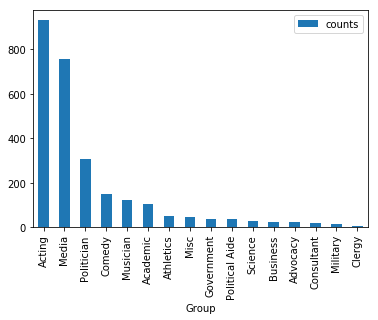

In [123]:
# Create a plot of these counts
import matplotlib.pyplot as plt

Sorted = counts_df.sort_values(['counts'], ascending=False)
Sorted.plot(kind='bar')


In [127]:
# Find records with missing group names
df[['Group', 'Raw_Guest_List', 'GoogleKnowlege_Occupation']][pd.isnull(df['Group']) == True]

,Group,Raw_Guest_List,GoogleKnowlege_Occupation
date,,,
1999-12-15,NaN,Greatest Millennium Special,NaN
1999-07-21,NaN,Third Anniversary Special,NaN
1999-08-30,NaN,The Daily Show Summer Spectacular,NaN
2000-11-20,NaN,Tales of Survival with Vance DeGeneres,NaN
2000-12-13,NaN,no guest,NaN
2000-07-19,NaN,Fourth Anniversary Special,NaN
2000-07-31,NaN,Campaign Trail to the Road to the White House ...,NaN
2001-05-02,NaN,No guest,NaN
2002-10-14,NaN,Road to Washington Special,NaN


Looking at this, if we were to just filter the data, it wouldn't show us the shows that was incorrectly inputted (0, -) since not everything is labeled as NaN for empty ones.

In [ ]:
# Let's find the total number of guests:
df['Raw_Guest_List'].describe()

In [ ]:
# Filter for musicians.  Show the musician names:
df[['Raw_Guest_List']][df['Group'] == 'Musician']

In [ ]:
# Find how many unique musicians:
df[['Raw_Guest_List']][df['Group'] == 'Musician'].describe()

In [ ]:
# List the unique musicians:
uniqueMusicians = df['Raw_Guest_List'][df['Group'] == 'Musician'].unique()
uniqueMusicians

In [ ]:
# Find the guests that appeared in 2010
# Option 1 (use the year column):
df[['Raw_Guest_List']][df['Year'] == 2010]

In [ ]:
# Option 2 (use the date index):
print df[['Raw_Guest_List', 'Group']].loc['2010-1-1':'2010-12-31']

In [ ]:
# Find the guests that appeared in 2010 and were actors
df[['Raw_Guest_List', 'Group']][df['Group'] == 'Acting'].loc['2010-1-1':'2010-12-31']

In [ ]:
df[['Raw_Guest_List', 'Group']][df['Group'] == 'Acting'].loc['2010-1-1':'2010-12-31'].describe()

In [ ]:
# Find the guests that appeared in November and were politicians
df[['Raw_Guest_List']][(df['Month'] == 11) & (df['Group'] == 'Politician')]

In [ ]:
# Count the number of shows by weekday
weekday_counts = df.groupby('Weekday').count()
weekday_counts[['Year']]


---

## Example 3 -- Scraping HTML Tables

*This material comes from Wes McKinney's textbook*

In [ ]:
tables = pd.read_html('https://www.fdic.gov/bank/individual/failed/banklist.html')

In [ ]:
# How many tables did we find on this webpage?
len(tables)

In [ ]:
# Our "failure" data will be in the first (and only) table:
failures = tables[0]

In [ ]:
failures.head()

In [ ]:
# How many bank failures were there per year?
close_timestamps = pd.to_datetime(failures['Closing Date'])
close_timestamps.dt.year.value_counts()

In [ ]:
# Which bank failures were in NY?
failures[failures['ST'] == 'NY']

In [ ]:
# How many bank failures were in NY?
failures[failures['ST'] == 'NY']['ST'].count()


---

## Further Studying

Check out https://realpython.com/python-data-cleaning-numpy-pandas/ for some more examples.